<a href="https://colab.research.google.com/github/Kishorecit/Titanic-Classification/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
titanic_data=pd.read_csv('train.csv')

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-82-96810fcf9176>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap="YlGnBu")


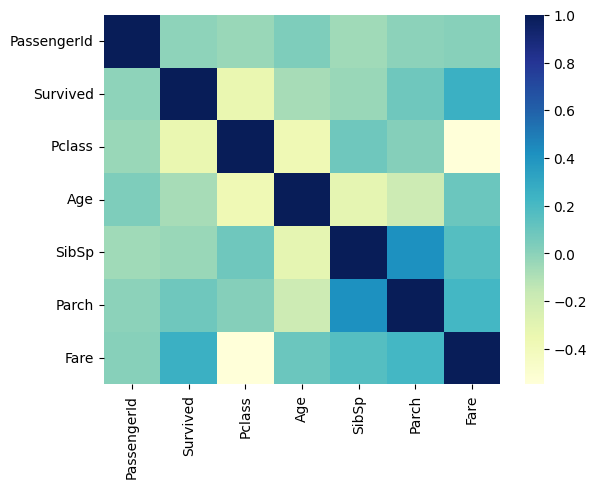

In [ ]:
import seaborn as sns
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
  strat_train_set=titanic_data.loc[train_indices]
  strat_test_set=titanic_data.loc[test_indices]



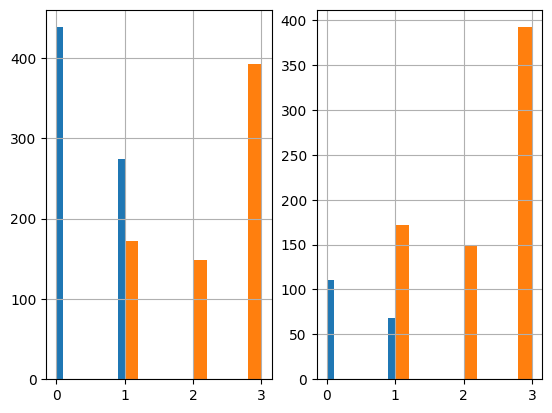

In [ ]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.show()


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 883 to 259
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          574 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    imputer = SimpleImputer (strategy="mean")
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X

In [ ]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[['Embarked']]).toarray()

    column_names = ["C", "S", "Q","N"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[['Sex']]).toarray()

    column_names = ["Female","Male"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    return X

In [ ]:
class FeatureDropper (BaseEstimator, TransformerMixin):

  def fit(self, X, y=None) :
    return self

  def transform(self, X):
    return X.drop(["Embarked","Name","Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline ([("ageimputer", AgeImputer ()),
                      ("featureencoder", FeatureEncoder ()),
                      ("featuredropper", FeatureDropper())])


In [ ]:
strat_train_set= pipeline.fit_transform(strat_train_set)

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
883,884,0,2,28.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
253,254,0,3,30.000000,1,0,16.1000,0.0,0.0,1.0,0.0,1.0
689,690,1,1,15.000000,0,1,211.3375,0.0,0.0,1.0,1.0,0.0
628,629,0,3,26.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
170,171,0,1,61.000000,0,0,33.5000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,282,0,3,28.000000,0,0,7.8542,0.0,0.0,1.0,0.0,1.0
75,76,0,3,25.000000,0,0,7.6500,0.0,0.0,1.0,0.0,1.0
264,265,0,3,29.618467,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
637,638,0,2,31.000000,1,1,26.2500,0.0,0.0,1.0,0.0,1.0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 883 to 259
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

X=strat_train_set.drop(['Survived'],axis=1)
y=strat_train_set['Survived']

scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()

param_grid=[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)

In [ ]:
GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth':[None,5,10],
                          'min_samples_split':[2,3,4],
                          'n_estimators':[10,100,200,500]}],
             return_train_score=True,scoring='accuracy')

In [ ]:
final_clf=grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [ ]:
strat_test_set=pipeline.fit_transform(strat_test_set)

In [ ]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
71,72,0,3,16.000000,5,2,46.9000,0.0,0.0,1.0,1.0,0.0
693,694,0,3,25.000000,0,0,7.2250,1.0,0.0,0.0,0.0,1.0
469,470,1,3,0.750000,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
306,307,1,1,30.029786,0,0,110.8833,1.0,0.0,0.0,1.0,0.0
720,721,1,2,6.000000,0,1,33.0000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
800,801,0,2,34.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
239,240,0,2,33.000000,0,0,12.2750,0.0,0.0,1.0,0.0,1.0
162,163,0,3,26.000000,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
688,689,0,3,18.000000,0,0,7.7958,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test=strat_test_set['Survived']

scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [ ]:
final_clf.score(X_data_test, y_data_test)

0.8044692737430168

In [ ]:
final_data=pipeline.fit_transform(titanic_data)

In [ ]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_final=final_data.drop(['Survived'],axis=1)
y_final=final_data['Survived']

scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [ ]:
prod_clf=RandomForestClassifier()

param_grid=[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

In [ ]:
prod_final_clf=grid_search.best_estimator_

In [ ]:
titanic_test_data=pd.read_csv("test.csv")

In [ ]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [ ]:
X_final_test=final_test_data
X_final_test=X_final_test.fillna(method="ffill")

scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)

In [ ]:
predictions=prod_final_clf.predict(X_data_final_test)

In [ ]:
final_df=pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv("predictions.csv", index=False)

In [ ]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
